In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
import pandas as pd
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

### Plotting as a 3D helix

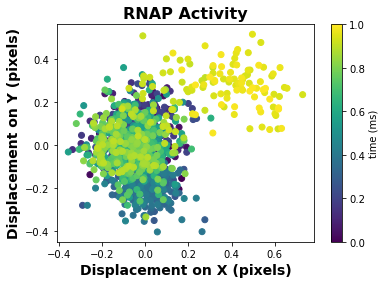

In [3]:
graph = pd.read_csv('DNAspin_time_average.csv')
# x and y are location, z is time with z step = 20 ms
x = graph.iloc[:,0]
y = graph.iloc[:,1]
z = graph.iloc[:,1]





#Plot figure
fig = plt.figure()

ax = fig.add_subplot(111)

#Make color change with change with z 
colors = cm.viridis(np.linspace(0, 1, len(z)))

p=ax.scatter(x, y, c=colors)
# Add colorbar
plt.colorbar(p, label= 'time (ms)') # need to add ticks to color map, unfortunately its a bit buggy, something to fix in the future




# Add Labels
ax.set_xlabel('Displacement on X (pixels)', fontweight = 'bold', fontsize = 14)
ax.set_ylabel('Displacement on Y (pixels)', fontweight = 'bold', fontsize = 14)


# Add Title, set aspect ratio, and save figure
plt.title('RNAP Activity', fontweight = 'bold', fontsize = 16)

ax.set_aspect(aspect=1)

#plt.savefig('RNAP_Activity_2D.png', dpi=300)
#show figure
plt.show()


# color changes from dark blue to green to yellow with time
# need to fix the color bar tick bug
# This would probably be more meaningful as a line graph or a movie

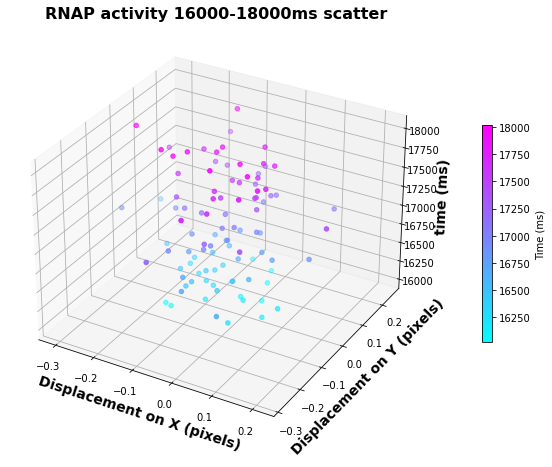

In [5]:
#Same as above but make it 3D and only show 100 points between 16000 and 18000 ms
graph = pd.read_csv('DNAspin_time_average.csv')

x2 = graph.iloc[800:901,0]
y2 = graph.iloc[800:901,1]
z2 = graph.iloc[800:901,2]

#Plot figure, set size
fig = plt.figure(figsize =(10,10))

#Specify projection, plot type, color scheme, and color bar, note: I use "ax2" to differentiate from "ax" above
# jupyter notebook had a problem with calling "ax" in this kernal due to calling "ax" in the above kernel
ax2 = fig.add_subplot(111, projection= '3d')

p = ax2.scatter3D(x2,y2,z2, c=z2, cmap='cool')
plt.colorbar(p,shrink = 0.40, orientation = "vertical", pad=.1, label = 'Time (ms)')


# Set labels
ax2.set_xlabel(' Displacement on X (pixels)', fontweight = 'bold', fontsize = 14)
ax2.set_ylabel(' Displacement on Y (pixels)', fontweight = 'bold', fontsize = 14)
ax2.set_zlabel(' time (ms)', fontweight = 'bold', fontsize = 14)
plt.title('RNAP activity 16000-18000ms scatter', fontweight = 'bold', fontsize = 16)



#Save fig
#plt.savefig('DNA_Origami_spinning_rotor_tip_16000-18000ms_scatter_average.png',dpi=300)

#show figure
plt.show()

#x2
# 3D projection gives a better idea of the data, I think it would be interesting to make this into a movie
#The axis seem a bit crowded, that may be something to fix, perhaps a different color scheme as well (this one cute tho)

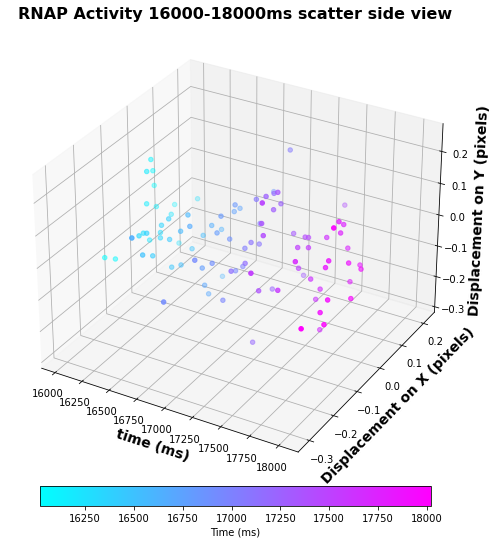

In [6]:
# Make it sideways
graph = pd.read_csv('DNAspin_time_average.csv')

y3 = graph.iloc[800:901,0]
z3 = graph.iloc[800:901,1]
x3 = graph.iloc[800:901,2]

#Plot figure
fig = plt.figure(figsize =(10,10))

#Specify projection
ax3 = fig.add_subplot(111, projection= '3d')
#Set plot type, color map, color bar
p=ax3.scatter(x3,y3,z3, c=x3, cmap='cool')
plt.colorbar(p,shrink = 0.70, orientation = "horizontal", pad=.01, label = 'Time (ms)')


#Add labels
ax3.set_xlabel(' time (ms)', fontweight = 'bold', fontsize = 14)
ax3.set_ylabel(' Displacement on X (pixels)', fontweight = 'bold', fontsize = 14)
ax3.set_zlabel('  Displacement on Y (pixels)', fontweight = 'bold', fontsize = 14)
plt.title('RNAP Activity 16000-18000ms scatter side view', fontweight = 'bold', fontsize = 16)


#Save figure
#plt.savefig('DNA_Origami_spinning_rotor_tip_16000-18000ms_scatter_side_view.png',dpi=300)

#show figure
plt.show()



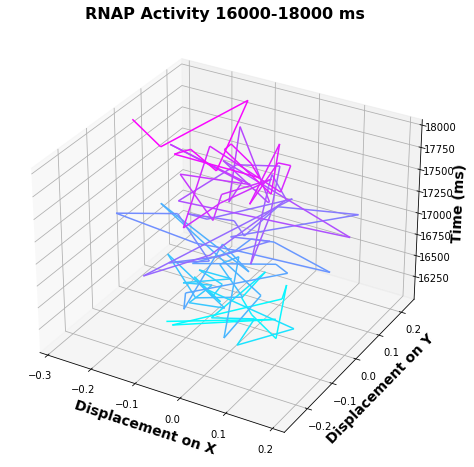

In [7]:
# code curtesy of https://stackoverflow.com/questions/10252412/matplotlib-varying-color-of-line-to-capture-natural-time-parameterization-in-da
# and https://stackoverflow.com/questions/38079366/matplotlib-line3dcollection-multicolored-line-edges-are-jagged

graph = pd.read_csv('DNAspin_time_average.csv')

x4 = graph.iloc[800:901,0]
y4 = graph.iloc[800:901,1]
z4 = graph.iloc[800:901,2]



#Make an array out of the data, transpose the data, (not sure what reshape does)
points = np.array([x4,y4,z4]).transpose().reshape(-1,1,3)
#cut up data into segments
segs = np.concatenate([points[:-1],points[1:]],axis=1)

#Collect segments of data, make each segment a different color according to the 'cool' color scheme
lc = Line3DCollection(segs, cmap = plt.get_cmap('cool'))
lc.set_array(z4)

#Plot figure, specify axis limits, title, label,etc.
fig = plt.figure(figsize=(8,8))
ax4 = fig.gca(projection = '3d')
ax4.set_zlim(min(z4), max(z4))
ax4.set_xlim(min(x4),max(x4))
ax4.set_ylim(min(y4),max(y4))
ax4.add_collection3d(lc, zs=z4, zdir='z')
plt.title('RNAP Activity 16000-18000 ms', fontweight = 'bold', fontsize= 16)
ax4.set_xlabel(' Displacement on X', fontweight = 'bold', fontsize = 14)
ax4.set_ylabel(' Displacement on Y', fontweight = 'bold', fontsize = 14)
ax4.set_zlabel(' Time (ms)', fontweight= 'bold' , fontsize =14)

#save figure as png
#plt.savefig('DNA_Origami_spinning_rotor_tip_16000-18000ms',dpi=300)

plt.show()

#NEXT STEPS:
#Add arrows to indicate vector direction
#Add color map
#make into movie

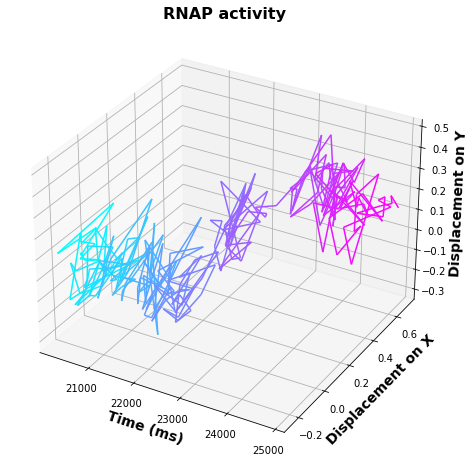

In [18]:
graph = pd.read_csv('DNAspin_time_average.csv')
#Make it sideways
x4 = graph.iloc[1000:,0]
y4 = graph.iloc[1000:,1]
z4 = graph.iloc[1000:,2]




points = np.array([z4,x4,y4]).transpose().reshape(-1,1,3)


segs = np.concatenate([points[:-1],points[1:]],axis=1)


lc = Line3DCollection(segs, cmap = plt.get_cmap('cool'))
lc.set_array(z4)


fig = plt.figure(figsize=(8,8))
ax4 = fig.gca(projection = '3d')
ax4.set_zlim(min(y4), max(y4))
ax4.set_xlim(min(z4),max(z4))
ax4.set_ylim(min(x4),max(x4))
ax4.add_collection3d(lc, zs=z4, zdir='z')
plt.title('RNAP activity', fontweight = 'bold', fontsize= 16)
ax4.set_xlabel(' Time (ms)', fontweight = 'bold', fontsize = 14)
ax4.set_ylabel(' Displacement on X', fontweight = 'bold', fontsize = 14)
ax4.set_zlabel(' Displacement on Y', fontweight = 'bold', fontsize = 14)


#plt.savefig('DNA_Origami_spinning_rotor_tip_16000-18000ms_side_view',dpi=300)

plt.show()

#NEXT STEPS:
#Add arrows to indicate vector direction
#Add color map
#make into movie

In [11]:
#aspect ratio for scatter
#animation and interactive plot
#comments on what the code means, (explain ax2. ax3. ax4. etc.)